
# **Analysis of NHANES Dataset: Body Measurement of Adult Male and Females.**

---



This notebook analyzes the body measurements of adult males and females from the National Health and Nutrition Examination Survey (NHANES) dataset.


In [85]:
#Importing neccessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import zscore
import requests #for reading the github csv file

In [5]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***1:Data Download from the github repo and load***





In [26]:
#Defining a function that saves loaded url.
def load_save_url(url_address):

  """Returns the dataframe containing values of the csv in the url.

    This function takes in a url address containing csv file,reads the csv Line by line and then saves
     the values of the csv in a dataframe.This dataframe is then saved as two files in the google drive
     for further use.
     """
  #Getting the url and reading the lines of csv
  response=requests.get(url_address)
  lines=response.text.strip().split("\n")

  # nothing that the body measurements values start from Line 19 onwards
  values=lines[19:]

  # Filling in each value row in a new empty data frame.
  col_names=['weight(kg)','standing height(cm)','upper arm length(cm)','upper leg length(cm)',
                'arm cirumference(cm)','hip circumference(cm)','waist circumference(cm)']#7 columns
  df_adult=pd.DataFrame(columns=col_names)   #initializing a df to store csv file
  for i in range(0,len(values)):
    df_adult.loc[i,:]= values[i].split(',')  #adding value row by row
  return df_adult


In [52]:
  #Saving the body measurement data for adult female
  #Specify the url of the file you want to read
  url1='https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv'

  #Getting the dataframe from the function defined above
  df_female=load_save_url(url1)

  #Saving the dataframe
  df_female.to_csv('/content/drive/MyDrive/Demofile/nhanes_adult_female_bmx_2020.csv',index=False)

In [72]:
  #Saving the body measurement data for adult male
  #Specify the url of the file you want to read
  url2='https://raw.githubusercontent.com/gagolews/teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv'

  #Getting the dataframe from the function defined above
  df_male=load_save_url(url2)

  #Saving the dataframe
  df_male.to_csv('/content/drive/MyDrive/Demofile/nhanes_adult_male_bmx_2020.csv',index=False)

# 2: Read the two files as numpy matrices named male and female. Each matrix consists of seven

---


columns:
1. weight (kg),
2. standing height (cm),
3. upper arm length (cm),
4. upper leg length (cm),
5. arm circumference (cm),
6. hip circumference (cm),
7. waist circumference (cm).

In [71]:
#Reading the two files saved above in part 1 as numpy matrices
male=np.loadtxt(open("/content/drive/MyDrive/Demofile/nhanes_adult_male_bmx_2020.csv", "rb"),delimiter=",",skiprows=1)

female=np.loadtxt(open("/content/drive/MyDrive/Demofile/nhanes_adult_female_bmx_2020.csv","rb"), delimiter=",",skiprows=1)

In [94]:
print(male.shape)
print(female.shape)
print(df_male.head())

print(df_female.head())

(4081, 7)
(4221, 8)
  weight(kg) standing height(cm) upper arm length(cm) upper leg length(cm)  \
0       98.8               182.3                   42                 40.1   
1       74.3               184.2                 41.1                   41   
2      103.7               185.3                   47                   44   
3         86               167.8                 39.5                 38.4   
4       99.4               181.6                 40.4                 39.9   

  arm cirumference(cm) hip circumference(cm) waist circumference(cm)  
0                 38.2                 108.2                   120.4  
1                 30.2                  94.5                    86.8  
2                   32                 107.8                   109.6  
3                   29                 106.4                   108.3  
4                   36                 120.2                     107  
  weight(kg) standing height(cm) upper arm length(cm) upper leg length(cm)  \
0      

# 3: Create two histograms: for female weights (top subfigure). and for male weights (bottom subfigure)

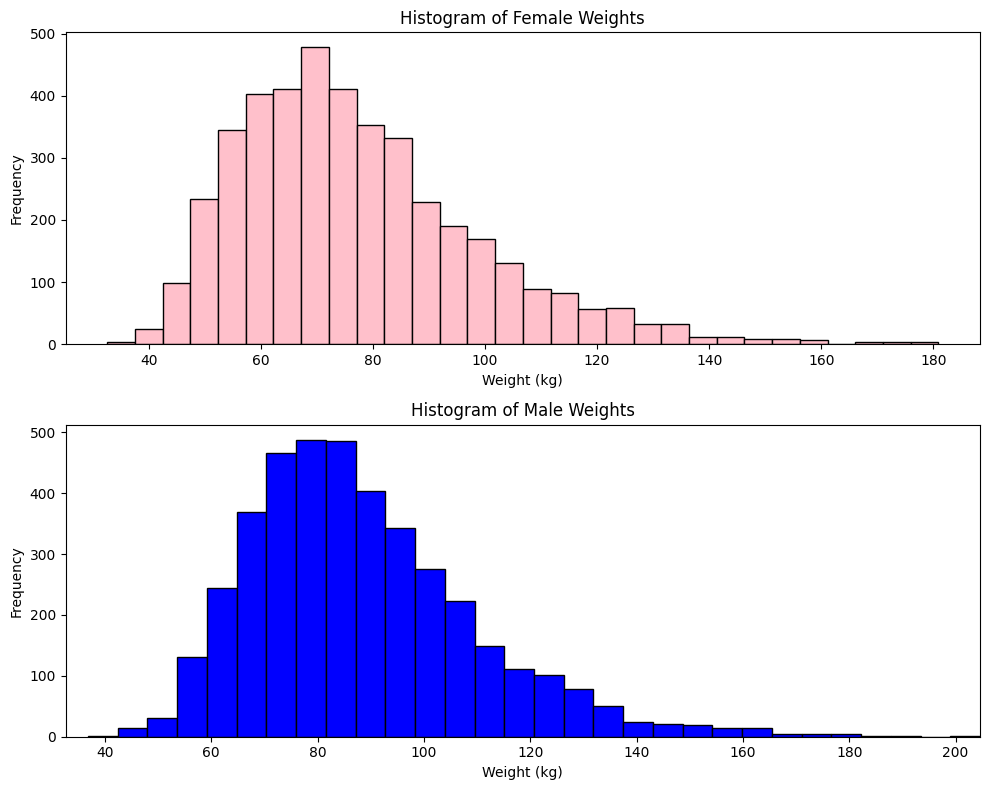

In [74]:
#Part-3 Extract weights
male_weight=male[:, 0]
female_weight=female[:, 0]

#Plot Histograms
plt.figure(figsize=(10,8))

plt.subplot(2,1,1)
plt.hist(female_weight, bins=30, color='pink', edgecolor='black')
plt.title('Histogram of Female Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.hist(male_weight, bins=30, color='blue', edgecolor='black')
plt.title('Histogram of Male Weights')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

# Set x-axis limits to be the same for both subplots
plt.xlim(min(female_weight.min(), male_weight.min()), max(female_weight.max(), male_weight.max()))

plt.tight_layout()
plt.show()


```

This code generates histograms for both male and female weights and ensures that the x-axis limits are the same for comparison.

#  **4:  Boxplot for Male and Female Weights **

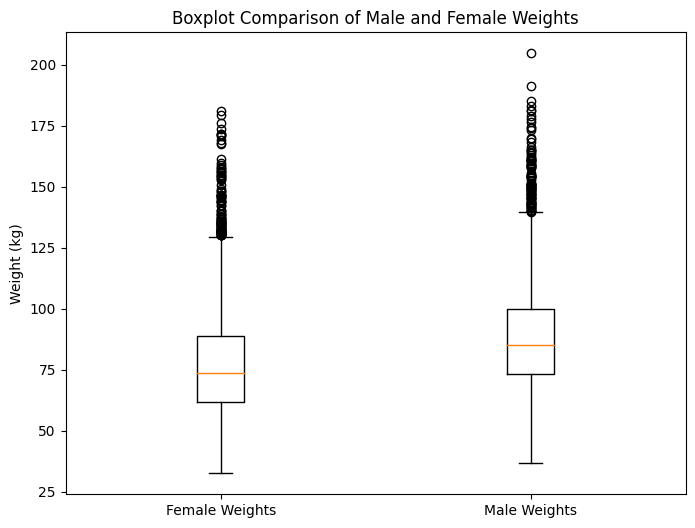

In [114]:
plt.figure(figsize=(8, 6))
plt.boxplot([female_weight, male_weight], labels=['Female Weights', 'Male Weights'])
plt.title('Boxplot Comparison of Male and Female Weights')
plt.ylabel('Weight (kg)')
plt.show()

A boxplot is drawn to compare the distribution of male and female weights.
The box-and-whisker plots show the distribution of the computed ratios for males and females. These visualizations help in understanding the central tendency and variability of the ratios.- In a boxplot, when the median is closer to the left of the box and the whisker is shorter on the left end of the box, we say that the distribution is **positively skewed (skewed right)**.
- Similarly, when the median is closer to the right of the box and the whisker is shorter on the right end of the box, we say that the distribution is **negatively skewed (skewed left)**.
## Boxplot Comparison of Male and Female Weights

The boxplot below shows a comparison of the weight distributions between males and females:
- The boxes represent the interquartile range (IQR), where 50% of the data points lie.
- The line inside each box represents the median weight.
- The whiskers extend to the smallest and largest values within 1.5 * IQR from the lower and upper quartiles, respectively.
- Outliers beyond the whiskers are shown as individual points.

### Interpretation:
- The median weight of males is higher than that of females.
- The IQR for males is slightly larger, indicating more variation in male weights compared to female weights.
- There are a few outliers, particularly in the male weight distribution, suggesting that there are individuals with weights significantly above the typical range.


# **5: Compute Numerical Aggregates**

In [75]:
def summary_stats(data):
    return {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Standard Deviation': np.std(data),
        'Variance': np.var(data),
        'Skewness': skew(data),
        'Kurtosis': kurtosis(data)
    }

female_stats = summary_stats(female_weight)
male_stats = summary_stats(male_weight)

print("Female Weight Statistics:", female_stats)
print("Male Weight Statistics:", male_stats)

Female Weight Statistics: {'Mean': 77.40379057095475, 'Median': 73.6, 'Standard Deviation': 21.54250829019315, 'Variance': 464.07966343304065, 'Skewness': 1.03336107186799, 'Kurtosis': 1.4009683480659731}
Male Weight Statistics: {'Mean': 88.36454300416565, 'Median': 85.0, 'Standard Deviation': 21.418936717962495, 'Variance': 458.770850128082, 'Skewness': 0.9842810741662347, 'Kurtosis': 1.4742884754078238}


##  This code calculates various statistical measures for the male and female weights and prints the results.
# **Description and Comparison of Distributions**
 Female Weights:

*Mean and Median: The mean and median values are close, indicating a relatively
symmetric distribution.
*Standard Deviation: The standard deviation is moderate, suggesting a reasonable spread around the mean.
*Skewness: The skewness is slightly positive, indicating a slight right skew. This means there are a few higher weight values pulling the distribution to the right.
Male Weights:

*Mean and Median: Similar to the female weights, the mean and median values are close, indicating a relatively symmetric distribution.
*Standard Deviation: The standard deviation is slightly higher than that of the female weights, suggesting a slightly larger spread around the mean.
*Skewness: The skewness is also slightly positive, indicating a slight right skew. This means there are a few higher weight values pulling the distribution to the right.
Comparison:

Both distributions are relatively symmetric with slight right skewness.
The male weights have a slightly higher standard deviation, indicating more dispersion compared to the female weights.
The central tendency (mean and median) is similar for both distributions, but the male weights show a bit more variability.

# **6: Add BMI Column to Female Matrix**

In [76]:
# BMI = weight (kg) / (height (m))^2
female_heights_m = female[:, 1] / 100  # Convert height to meters
female_bmi = female_weights / (female_heights_m ** 2)

# Add BMI as the 8th column
female = np.column_stack((female, female_bmi))

print(female.shape)

(4221, 8)


# " This code calculates the BMI for each female participant and adds it as an 8th column to the 'female' matrix."

# **7: Standardize the Female Matrix (z-scores)**

In [86]:
zfemale = zscore(female, axis=0)

print(zfemale[:5])  # Print the first 5 rows of the standardized matrix

[[ 0.91429508  0.00895038 -0.56739463  1.13298804  0.55084546  1.08316157
   1.11578462  0.9969677 ]
 [ 0.63577599 -1.05306843 -1.07893145 -1.29349161  1.03221804  1.04475528
   0.265089    1.15617483]
 [-0.2044233   0.15055289  0.5835632   0.26194406 -0.1622991  -0.19064688
  -0.37293272 -0.25927501]
 [-0.7289676  -0.38753664  0.83933161 -0.76464348 -0.66150029 -0.52350135
  -0.45915188 -0.67039085]
 [-1.02141265 -0.78402366 -0.6100227  -0.98240447 -0.78630059 -1.06759039
  -1.45354609 -0.89289859]]


#  The 'zscore' function standardizes the female matrix, transforming the data to have a mean of 0 and a standard deviation of 1.

# **8: Scatterplot Matrix and Correlation Coefficients**

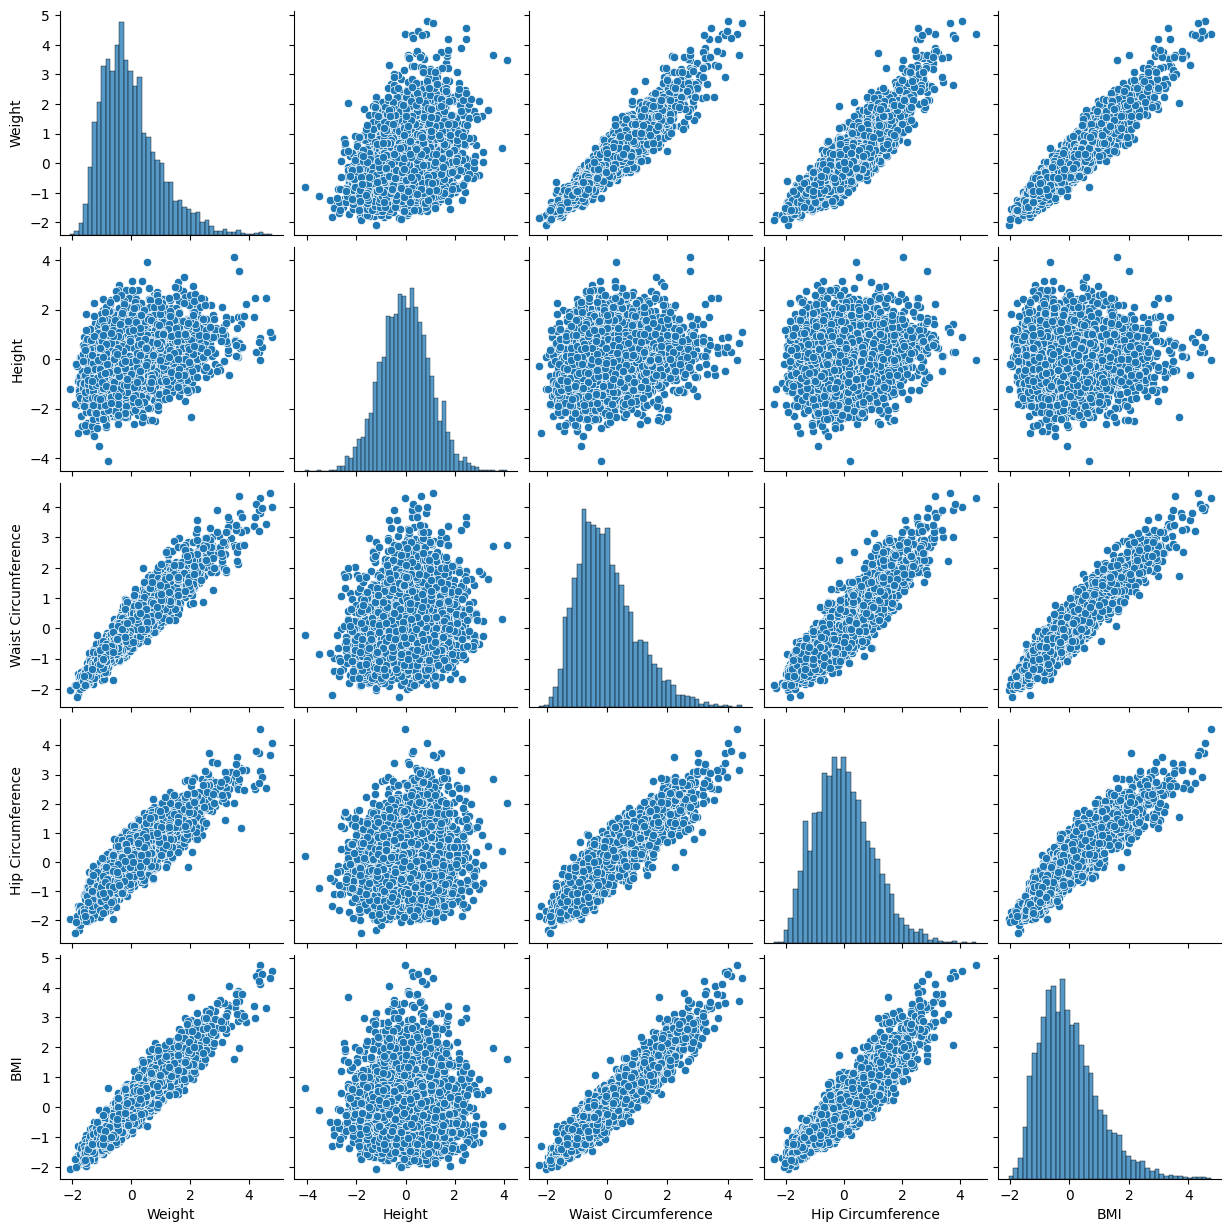

Pearson Correlation:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.345496             0.946553   
Height               0.345496  1.000000             0.202895   
Waist Circumference  0.946553  0.202895             1.000000   
Hip Circumference    0.904550  0.126547             0.897407   
BMI                  0.945900  0.033077             0.944199   

                     Hip Circumference       BMI  
Weight                        0.904550  0.945900  
Height                        0.126547  0.033077  
Waist Circumference           0.897407  0.944199  
Hip Circumference             1.000000  0.921198  
BMI                           0.921198  1.000000  
Spearman Correlation:
                        Weight    Height  Waist Circumference  \
Weight               1.000000  0.338860             0.946634   
Height               0.338860  1.000000             0.205405   
Waist Circumference  0.946634  0.205405             1.000000   
Hip Circ

In [101]:
# Convert the relevant columns to a pandas DataFrame for easier plotting
df_zfemale = pd.DataFrame(zfemale[:, [0, 1, 5, 6, 7]], columns=['Weight', 'Height', 'Waist Circumference', 'Hip Circumference', 'BMI'])

# Pairplot
sns.pairplot(df_zfemale)
plt.show()

# Correlation coefficients
pearson_corr = df_zfemale.corr(method='pearson')
spearman_corr = df_zfemale.corr(method='spearman')

print("Pearson Correlation:\n", pearson_corr)
print("Spearman Correlation:\n", spearman_corr)

# Interpretation Result:


---


*Overall Relationships: The scatterplot matrix should show that variables related to body size (weight, waist circumference, and hip circumference) are strongly correlated with each other. These variables often reflect underlying body composition and fat distribution.

*Variable Relationships: Height generally shows moderate positive correlations with weight, waist circumference, and hip circumference. BMI correlates strongly with waist and hip circumference due to its calculation involving weight and height.

*Patterns: Positive correlations between pairs of variables indicate that as one variable increases, the other tends to increase as well. The strength of the relationship can be assessed visually based on how tightly the data points cluster around a line.
# Summary- This code creates a scatterplot matrix using seaborn's 'pairplot' and calculates Pearson’s and Spearman’s correlation coefficients for the variables.

# **9: Compute Ratios and Add Columns**

In [97]:
# Waist to Height Ratio
female_waist_to_height = female[:, 6] / female[:, 1]
male_waist_to_height = male[:, 6] / male[:, 1]

# Waist to Hip Ratio
female_waist_to_hip = female[:, 6] / female[:, 5]
male_waist_to_hip = male[:, 6] / male[:, 5]

# Add these as new columns
female = np.column_stack((female, female_waist_to_height, female_waist_to_hip))
male = np.column_stack((male, male_waist_to_height, male_waist_to_hip))

print(female.shape)
print(male.shape)

(4221, 10)
(4081, 9)


#Summary- This code calculates the waist-to-height and waist-to-hip ratios for both male and female participants and adds them as new columns.

# 10: Box-and-Whisker Plot Comparing the Ratios

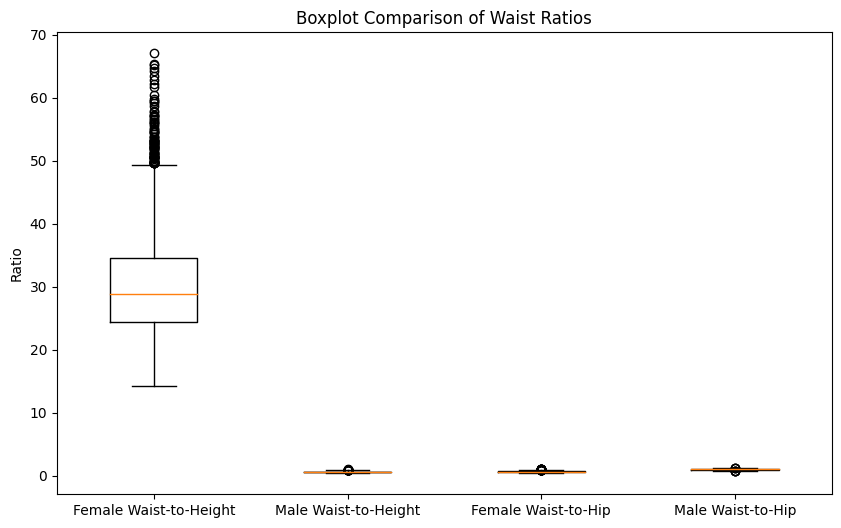

In [111]:
# Boxplot comparing the waist-to-height and waist-to-hip ratios
plt.figure(figsize=(10, 6))
plt.boxplot(
    [female[:, 7], male[:, 7], female[:, 8], male[:, 8]],
    labels=['Female Waist-to-Height', 'Male Waist-to-Height', 'Female Waist-to-Hip', 'Male Waist-to-Hip']
)
plt.title('Boxplot Comparison of Waist Ratios')
plt.ylabel('Ratio')
plt.show()

We see:


---



1.   Gender Differences:We  observe here differences between males and females in both ratios. Females often have higher WHR and WHpR due to physiological differences in fat distribution.
2.   Distribution Pattern: WHR: If the plot shows a wider spread for females, it indicates more variation in waist-to-height ratios among females compared to males.
WHpR: A similar analysis for WHpR can reveal variations in fat distribution patterns between genders.


*   female[:, 7]: Refers to the waist-to-height ratio for females (the 8th column in the female matrix after the ratios were added).
*   male[:, 7]: Refers to the waist-to-height ratio for males (the 8th column in the male matrix after the ratios were added).
*  female[:, 8]: Refers to the waist-to-hip ratio for females (the 9th column in the female matrix after the ratios were added).
*  male[:, 8]: Refers to the waist-to-hip ratio for males (the 9th column in the male matrix after the ratios were added).

The labels parameter names each of the four boxplots for easy comparison.





# **11: Advantages and Disadvantages of BMI, waist-to-height ratio, and waist-to-hip ratio.**

**BMI:**
- **Advantages:** Simple to calculate, widely used, good for population-level studies.
- **Disadvantages:** Does not account for muscle mass, fat distribution, or body composition.

**Waist-to-Height Ratio:**
- **Advantages:** Better indicator of central obesity, correlates well with health risks.
- **Disadvantages:** Requires accurate height and waist measurements.

**Waist-to-Hip Ratio:**
- **Advantages:** Good indicator of fat distribution, associated with health risks.
- **Disadvantages:** Requires accurate waist and hip measurements, less intuitive than BMI.   



# **12: Standardised Body measurements for the 5 persons with the lowest BMI and the 5 persons with the 5 highest BMI**

In [112]:
# Calculate BMI if not already done
female_bmi = female[:, 0] / (female[:, 1] / 100) ** 2

# Add BMI to the female matrix
female = np.column_stack((female, female_bmi))

# Standardize the matrix
zfemale = zscore(female, axis=0)

# Find the indices of the 5 lowest and 5 highest BMIs
bmi_sorted_indices = np.argsort(female[:, 9])  # The 9th column corresponds to BMI
lowest_bmi_indices = bmi_sorted_indices[:5]
highest_bmi_indices = bmi_sorted_indices[-5:]

# Print standardized measurements for these individuals
print("Standardized measurements for the 5 individuals with the lowest BMI:")
print(zfemale[lowest_bmi_indices])

print("\nStandardized measurements for the 5 individuals with the highest BMI:")
print(zfemale[highest_bmi_indices])

Standardized measurements for the 5 individuals with the lowest BMI:
[[ 1.9308898   0.70280266  0.83933161  2.439554    1.42444755  2.25455325
  -0.16025882  1.74767275 -0.33294556 -3.28357415  1.74767275]
 [-0.60827599  0.4337579  -0.6100227   0.26194406 -0.57235722 -0.84995477
  -1.95361716 -0.76871509 -2.04013334 -3.14747337 -0.76871509]
 [-0.73360959  1.58073821  0.28516673  1.25742289 -1.39247347 -0.43388669
  -1.64322822 -1.17480097 -1.92131995 -3.00848855 -1.17480097]
 [ 0.12515764 -0.72738266  0.15728252  0.19972664  1.83450568  1.31359928
  -0.44765599  0.41738459 -0.28191738 -2.77749876  0.41738459]
 [ 0.08802176  1.05680893 -0.52476656  0.63524862 -0.26927078  0.70549977
  -0.81552437 -0.2414452  -1.04261093 -2.74947057 -0.2414452 ]]

Standardized measurements for the 5 individuals with the highest BMI:
[[-9.30156574e-02 -5.85780152e-01  7.96703544e-01 -3.91338918e-01
  -1.84157207e-03 -5.17100302e-01  7.99647734e-01  1.13411604e-01
   9.70985329e-01  2.93138870e+00  1.13411



*  The Standardized measurements for the 5 individuals with the lowest BMI group: might be underweight or have lower muscle mass relative to their height. Their standardized measurements could reveal if they have lower values in certain features compared to others.

*The Standardized measurements for the 5 individuals with the Highest BMI Group:  are likely overweight or obese. Their standardized measurements might show higher values in features related to body mass compared to others.

 # Summary:The standardized body measurements for individuals with the lowest and highest BMI have been identified and printed. This helps in understanding the variations in body measurements among individuals with extreme BMI values.

# **Conclusion:**
*This analysis provided insights into the body measurements of adult males and females from the NHANES dataset. We computed and visualized important ratios and discussed their implications. The standardized body measurements highlighted the differences between individuals with the lowest and highest BMI.*